https://www.kaggle.com/datasets/aczy156/software-defect-prediction-nasa?resource=download

In [3]:
import pandas as pd
from scipy.io import arff

# Load the ARFF file
data, meta = arff.loadarff('CM1.arff')

# Convert the record array to a pandas DataFrame
df = pd.DataFrame(data)

# Decode byte strings in object columns (if necessary)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.decode('utf-8')

df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,9.0,5.0,3.0,2.0,2.0,8.0,3.0,0.16,4.0,2.0,...,10.0,0.10,36.0,66.0,21.0,17.0,31.0,19.05,19.0,N
1,19.0,3.0,1.0,2.0,0.0,4.0,2.0,0.06,2.0,2.0,...,23.0,0.04,66.0,69.0,34.0,12.0,55.0,5.71,35.0,N
2,0.0,9.0,0.0,0.0,0.0,10.0,5.0,0.56,2.0,5.0,...,9.0,0.50,10.0,21.0,7.0,9.0,10.0,0.00,9.0,N
3,2.0,15.0,2.0,1.0,9.0,24.0,8.0,0.19,10.0,2.4,...,18.0,0.15,67.0,120.0,43.0,19.0,54.0,19.61,42.0,N
4,5.0,5.0,1.0,0.0,0.0,8.0,3.0,0.15,4.0,2.0,...,9.0,0.12,25.0,46.0,17.0,14.0,26.0,0.00,20.0,N


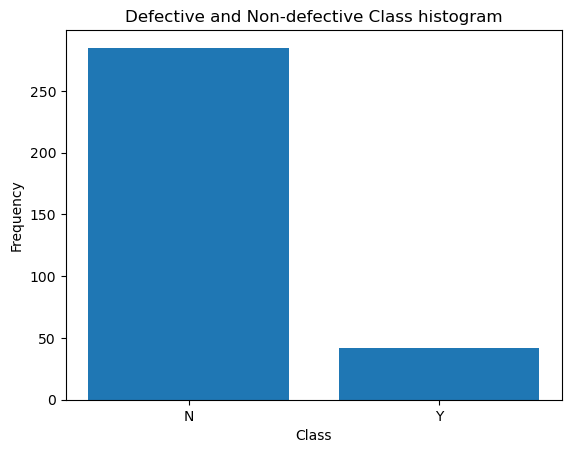

In [5]:
#Defective and Non-defective Class histogram
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['Defective'].value_counts()

# Plot the histogram
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Defective and Non-defective Class histogram')
plt.xticks(rotation=0)
plt.show()


<Axes: xlabel='Defective', ylabel='LOC_TOTAL'>

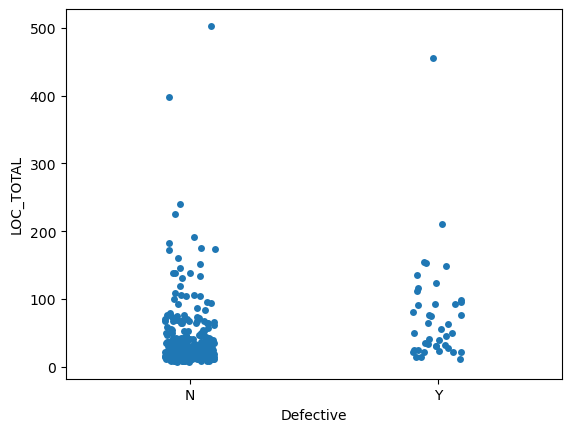

In [8]:
# Dispersion plot of class Defective
import seaborn as sns

sns.stripplot(x='Defective', y='LOC_TOTAL', data=df, jitter=True)

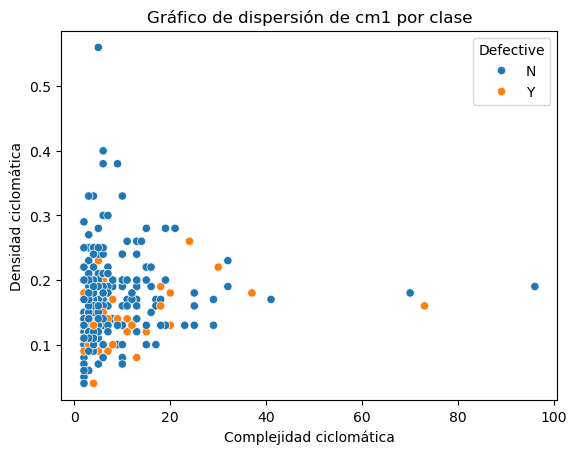

In [10]:
    # Suponiendo que las columnas relevantes para la visualización se llaman 'metric_1', 'metric_2' y 'class'
# Reemplaza 'metric_1' y 'metric_2' con los nombres reales de las columnas que quieres visualizar.
# 'class' es la columna que contiene la etiqueta de clase (defecto o no defecto).
sns.scatterplot(x='CYCLOMATIC_COMPLEXITY', y='CYCLOMATIC_DENSITY', hue='Defective', data=df)

# Añadir títulos y etiquetas
plt.title('Gráfico de dispersión de cm1 por clase')
plt.xlabel('Complejidad ciclomática')
plt.ylabel('Densidad ciclomática')
plt.show()